# 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### 관련 데이터셋 로드

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
samplest=pd.read_csv('sampleSubmission.csv')

#### 데이터 확인

In [3]:
train



# session : 계절 
# holiday : 공휴일 여부 
# workingday : 평일 여부
# weather : 날씨
# temp : 온도
# atemp : 체감온도
# humidity : 습도
# windspeed : 풍속 
# casual : 대여 회수
# registered : 등록자의 대여횟수
# count : 대여횟수





,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### 문자열 날짜를 datetime으로 변환 + 년월일시간으로 분리

In [5]:
train["datetime"] = train.datetime.apply(pd.to_datetime) 
train["year"] = train.datetime.apply(lambda x : x.year) 
train["month"] = train.datetime.apply(lambda x : x.month) 
train["day"] = train.datetime.apply(lambda x : x.day) 
train["hour"] = train.datetime.apply(lambda x : x.hour) 


train.head()



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


#### 필요없는 열 제거

In [6]:


drop_col = ["casual", "registered", "datetime"] 

train.drop(columns=drop_col, axis=1, inplace= True)

# 데이터 시각화

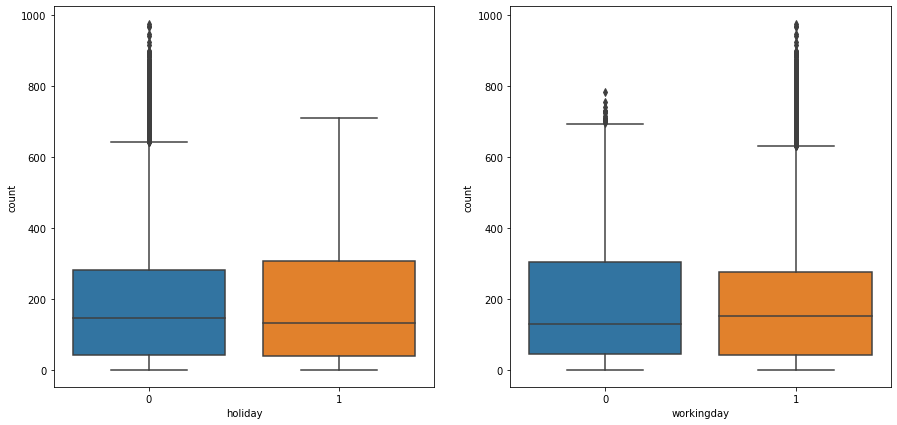

In [7]:

fig, ax = plt.subplots(1, 2, figsize=(15,7))
     
# holiday 와 workingday 의 boxplot
sns.boxplot(data=train, x='holiday', y='count', ax=ax[0])
sns.boxplot(data=train, x='workingday', y='count', ax=ax[1])
 
plt.show()

<AxesSubplot:xlabel='weather', ylabel='count'>

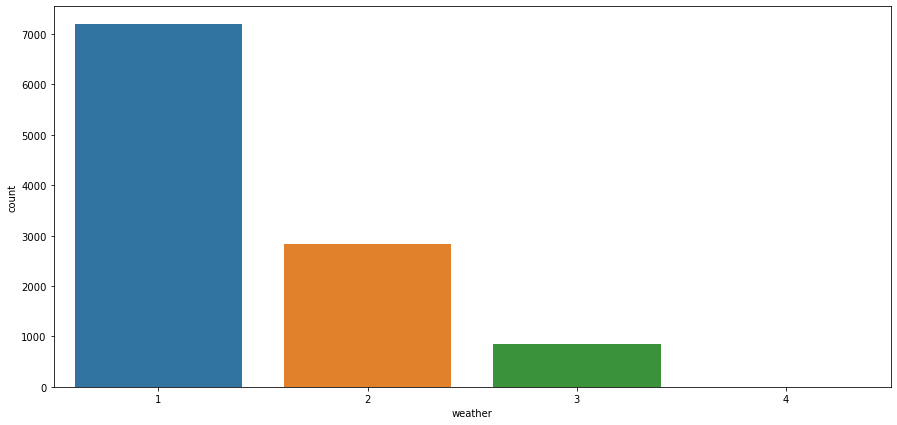

In [8]:
fig,ax= plt.subplots(figsize=(15,7))

sns.countplot(x='weather',data=train)


# 1:맑은 날씨

# 2:안개

# 3:비,가벼운 눈

# 4:폭설,폭우

 

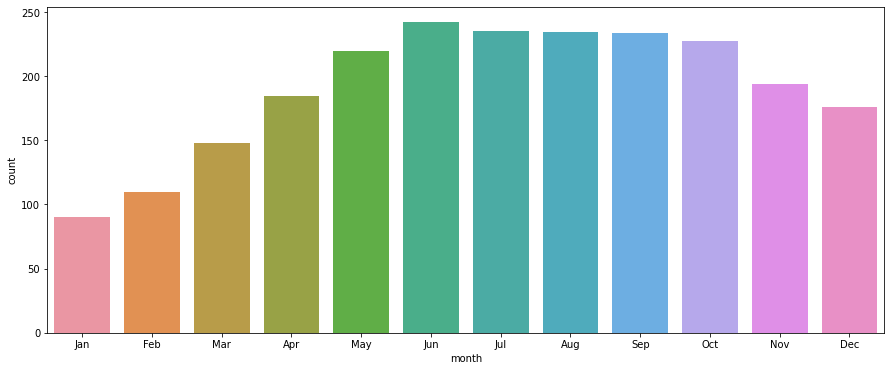

In [9]:
fig, ax = plt.subplots(figsize=(15,6))
 
# 월별 대여량
sns.barplot(data=train, x='month', y='count', ax=ax, ci=None)
 
# x축 값이름 변경
labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']
ax.set(xticklabels=labels)
 
plt.show()

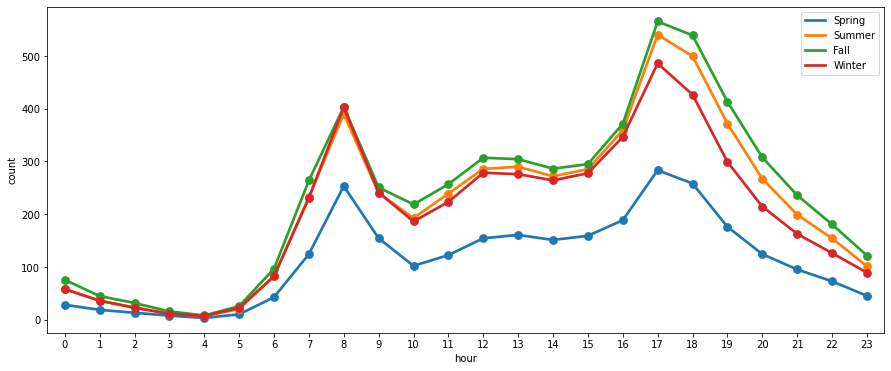

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
 
# 계절에 따른 시간별 대여량
sns.pointplot(data=train, x='hour', y='count',hue='season', ax=ax, ci=None)
 

labels=['Spring', 'Summer', 'Fall', 'Winter']
ax.legend(labels=labels)
 
plt.show()

#### 성능 평가 지표들 정의

In [11]:
#*np.log1p(val):val+1후 로그 변환 수행 => val=0인 경우 -inf 방지

from sklearn.metrics import mean_squared_error, mean_absolute_error

def get_rmsle(y, pred): 
    log_y = np.log1p(y) 
    log_pred = np.log1p(pred)
    mlse = np.sum((log_y - log_pred)**2) 
    rmlse = np.sqrt(mlse) 
    return rmlse 

def get_rmse(y, pred): 
    return np.sqrt(mean_squared_error(y, pred)) 

def eval_reg(y, pred): 
    rmlse = get_rmsle(y, pred) 
    rmse = get_rmse(y, pred) 
    mae = mean_absolute_error(y, pred) 
    print("rmlse : {0:.3f}\nrmse : {1:.3f}\nmae : {2:.3f}".format(rmlse, rmse, mae))

#### 단순 선형 회귀 학습 후 평가

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 

y = train["count"] 
X = train.drop(columns=["count"], axis=1, inplace=False) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

lr = LinearRegression() 
lr.fit(X_train, y_train) 

pred = lr.predict(X_test) 

eval_reg(y_test, pred)
#성능 평가 지표들 오차 값이 크게 나옴

rmlse : 65.386
rmse : 141.704
mae : 105.013


#### 오차가 가장 큰 값들 비교

In [13]:
#종속 변수 count 값을 생각하면 오차가 상당히 크게 나옴 오차가 가장 큰 경우를 비교해보자

def get_top_error_data(y_test, pred, n_tops = 5): 
    res = pd.DataFrame(data=y_test.values, columns=["real"]) 
    res["predicted"] = pred 
    res["diff"] = np.abs(res["real"] - res["predicted"]) 
    print(res.sort_values("diff", ascending=False)[:n_tops]) 
    
get_top_error_data(y_test, pred, n_tops=5)

#실제값과 예측 값사이 상당히 큰 오차 -> 타겟 값의 분포가 왜곡될 가능성이 큼

      real   predicted        diff
2336   834  187.571137  646.428863
2151   809  196.254397  612.745603
1862   784  183.232707  600.767293
1376   943  359.258203  583.741797
354    977  394.995067  582.004933


## 라벨 분포 히스토그램 시각화

<AxesSubplot:>

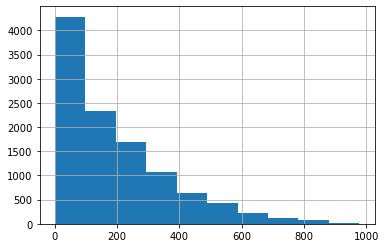

In [14]:
#로그 변환을 통해 정규분포에 가깝게 변환
#예측 오류가 매우 커 왜곡된 분포를 따르는지 확인해야함

y.hist()

<AxesSubplot:>

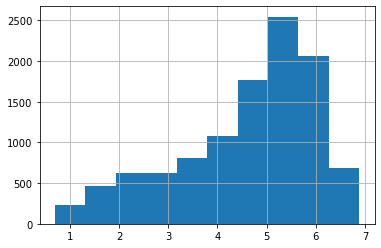

In [15]:
#로그 변환을 통해 y를 정규분포 형태로 바꿈


y = np.log1p(y)
y.hist()

#이전에 0을 중심으로 하던 분포가 5~6울 중심으로 정규분포와 유사해짐

#### 변환된 데이터로 재학습 및 성능 평가

In [16]:
#로그 변환을 수행 후 오차 척도들이 크게 줄어들었다

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

lr = LinearRegression() 
lr.fit(X_train, y_train) 

pred = lr.predict(X_test) 

eval_reg(y_test, pred) 
get_top_error_data(y_test, pred, n_tops=5)

#rmse,mae는 크게 줄어들었으나 rmlse는 여전히 크다

rmlse : 13.367
rmse : 1.027
mae : 0.811
          real  predicted      diff
1749  6.156979   3.031210  3.125769
50    1.098612   4.157386  3.058773
502   6.255750   3.200584  3.055166
3192  0.693147   3.643939  2.950792
79    1.386294   4.305413  2.919119


<AxesSubplot:>

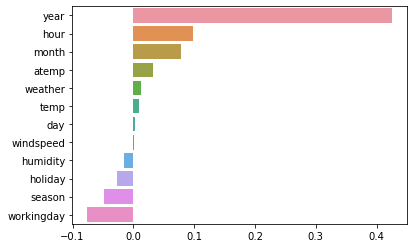

In [19]:
#회귀 모델에서 피처 중요도로 보았던것과는 달리 선형 회귀 모델에선 회귀 계수로 어떤 피처가 중요하게 판단되었는지 몰수 있음

coeff = pd.Series(data=lr.coef_, index=X.columns) 
coeff_sort = coeff.sort_values(ascending=False) 
sns.barplot(x=coeff_sort.values, y=coeff_sort.index)


#### 카테고리형 데이터들을 원핫인코딩 변환 후 학습,결과 출력

In [20]:
#상대적으로 큰 값을 갖는 year가 높은 중요도를 가진것으로 나오고 있음 year 간에는 큰 의미가 없는데도 영향을 주고 있으니 카테고리형 변수들을 인코딩 필요
X_ohe = pd.get_dummies(X, columns=["year", "month", "hour", "holiday", "workingday", "season", "weather"]) 


X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.3) 
lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred = lr.predict(X_test) 
eval_reg(y_test, pred) 
get_top_error_data(y_test, pred, n_tops=5)

#rmlse 줄어든 모습

rmlse : 8.117
rmse : 0.589
mae : 0.442
          real  predicted      diff
226   0.693147   4.112457  3.419310
220   1.386294   4.101013  2.714719
1151  2.302585   4.959625  2.657040
2827  1.098612   3.692810  2.594198
450   1.386294   3.899658  2.513364
